In [7]:
import pandas as pd
import numpy as np

from nltk import tokenize
from operator import itemgetter
import math
from tqdm import tqdm
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))

from sklearn.feature_extraction.text import CountVectorizer
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

#reference : https://github.com/andybywire/nlp-text-analysis/blob/master/text-analytics.ipynb

In [75]:
kk = os.listdir("/home/amansinha/extractpubmed/papers/key_meta_all/")
kk

['tdm1_metadf2.csv',
 'genome wide association study_metadf2.csv',
 'progression free survival_metadf2.csv',
 'hormone therapy_metadf2.csv',
 'overall survival_metadf2.csv',
 'disease free survival_metadf2.csv',
 'radiation_metadf2.csv',
 'chemotherapy_metadf2.csv',
 'neratinib_metadf2.csv',
 'pertuzumab_metadf2.csv',
 'pathologic complete response_metadf2.csv',
 'surgery_metadf2.csv',
 'polymorphism_metadf2.csv',
 'neoadjuvant_metadf2.csv',
 'adjuvant_metadf2.csv',
 'trastuzumab_metadf2.csv',
 'polygenic risk score_metadf2.csv',
 'Breast Cancer_metadf2.csv']

In [194]:
key = 'Breast Cancer'
df = pd.read_csv(f'/home/amansinha/extractpubmed/papers/key_meta_all/{key}_metadf2.csv')
df['keywords'] = df['keywords'].str.strip('[]').str.split(',')
df['keywords'] = df['keywords'].apply(lambda x: [xx.strip().strip("''") for xx in x])
df

,pubmed_id,title,keywords,publication_date,abstract
0,34038908,3D Breast Volume Estimation.,"[3D surface scan, Breast MRI, Breast cancer, B...",2021-05-27,Breast volume estimation is considered crucial...
1,34038878,Monte Carlo simulation of pixelated CZT detect...,"[Molecular Breast Imaging, Monte Carlo Simulat...",2021-05-27,Molecular Breast Imaging (MBI) of 99mTc-sestam...
2,34038755,A novel XBP1 variant is highly enriched in can...,"[Cancer cell survival, XBP1, XBP1v1, Xv1]",2021-05-27,XBP1 is a basic leucine zipper (bZIP) transcri...
3,34038745,Bromodomain-containing protein 7 regulates mat...,"[Apoptosis, Bromodomain-containing protein 7, ...",2021-05-27,Intervertebral disc degeneration (IDD) results...
4,34038440,High MMP-11 expression associated with low CD8...,[],2021-05-27,Matrix metalloproteinase-11 (MMP-11) promote c...
...,...,...,...,...,...
4989,33742240,"A prospective multi-centre, randomized study c...",[Taxane-associated pain syndrome],2021-03-21,Taxane-associated pain syndrome (TAPS) is comm...
4990,33742140,Cytoplasmic ADP-ribosylation levels correlate ...,[],2021-03-21,ADP-ribosylation (ADPR) is a posttranslational...
4991,33742136,The noncoding RNAs SNORD50A and SNORD50B-media...,[],2021-03-21,Small nucleolar RNA SNORD50A and SNORD50B (SNO...
4992,33742130,Glioma pathogenesis-related protein 1 performs...,[],2021-03-21,Glioma pathogenesis-related protein 1 (GLIPR1)...


In [195]:
corpus = []
df['word_count'] = df['abstract'].apply(lambda x: len(str(x).split(" ")))
ds_count = len(df.word_count)
for i in range(0, ds_count):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(df['abstract'][i]))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove tags
    #text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    #text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    text = text.split()
    
    # Stemming
    ps=PorterStemmer()
    
    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

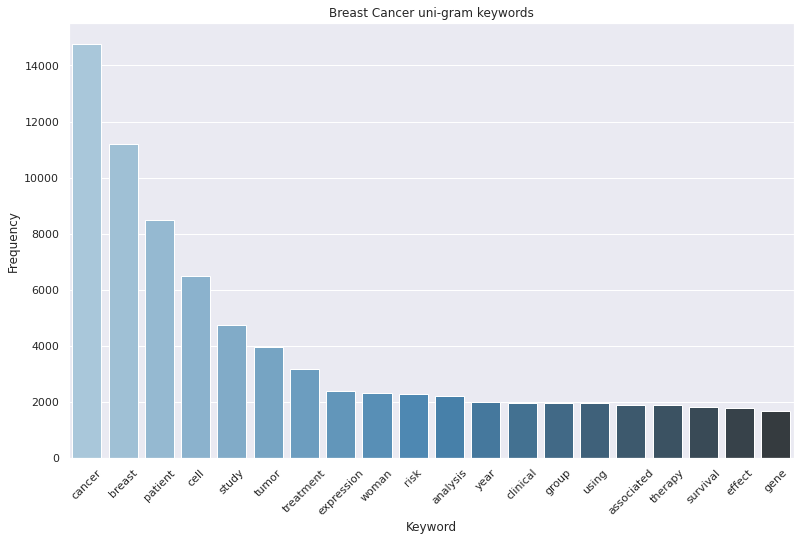

In [196]:
# View most frequently occuring keywords
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

# Convert most freq words to dataframe for plotting bar plot, save as CSV
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
#print(top_df)
#top_df.to_csv(file_prefix + '_top_words.csv')

# Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title(f'{key} uni-gram keywords')
g.figure.savefig(f"{key}uni-gram.png", bbox_inches = "tight")
#g.figure.savefig(file_prefix + "_keyword.png", bbox_inches = "tight")

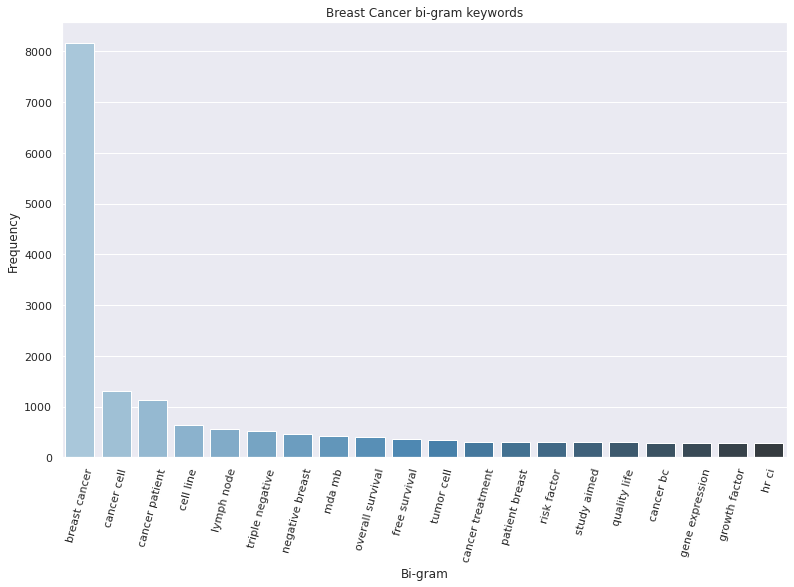

In [197]:
# Most frequently occuring bigrams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq bigrams to dataframe for plotting bar plot, save as CSV
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Frequency"]
#print(top2_df)
#top2_df.to_csv(file_prefix + '_bigrams.csv')

# Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Frequency", data=top2_df, palette="Blues_d")
h.set_xticklabels(h.get_xticklabels(), rotation=75)
h.set_title(f'{key} bi-gram keywords')
h.figure.savefig(f"{key}bi-gram.png", bbox_inches = "tight")
#h.figure.savefig(file_prefix + "_bi-gram.png", bbox_inches = "tight")

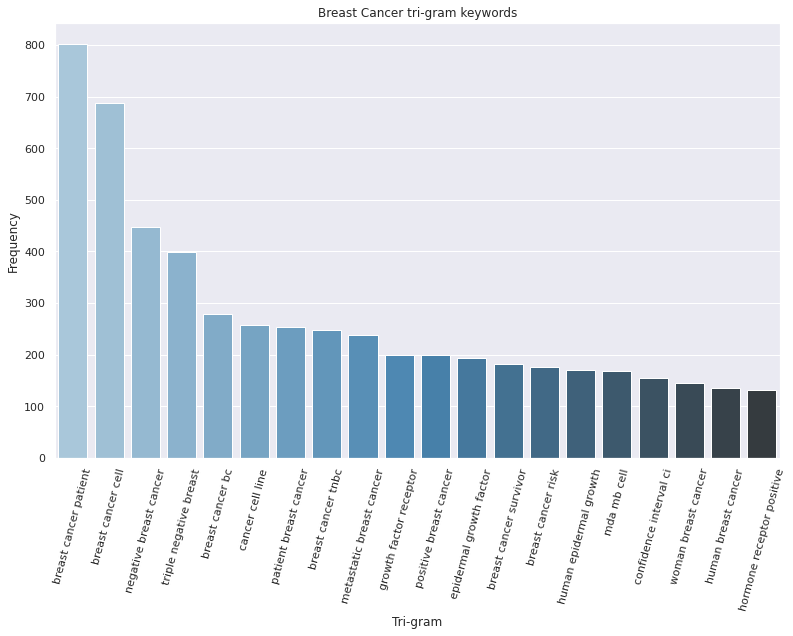

In [198]:

# Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq trigrams to dataframe for plotting bar plot, save as CSV
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Frequency"]
#print(top3_words)
#print(top3_df)
#top3_df.to_csv(file_prefix + '_trigrams.csv')

# Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Frequency", data=top3_df, palette="Blues_d")
j.set_xticklabels(j.get_xticklabels(), rotation=75)
j.set_title(f'{key} tri-gram keywords')
j.figure.savefig(f"{key}tri-gram.png", bbox_inches = "tight")

In [199]:
# Get TF-IDF (term frequency/inverse document frequency) -- 
# TF-IDF lists word frequency scores that highlight words that 
# are more important to the context rather than those that 
# appear frequently across documents

cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=2000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

from sklearn.feature_extraction.text import TfidfTransformer 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)

# Get feature names
feature_names=cv.get_feature_names()
 
# Fetch document for which keywords needs to be extracted
doc=' '.join(corpus)#[ds_count-1]
 
# Generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

'\nimport csv\nwith open(file_prefix + \'td_idf.csv\', \'w\', newline="") as csv_file:  \n    writer = csv.writer(csv_file)\n    writer.writerow(["Keyword", "Importance"])\n    for key, value in keywords.items():\n       writer.writerow([key, value])\n'

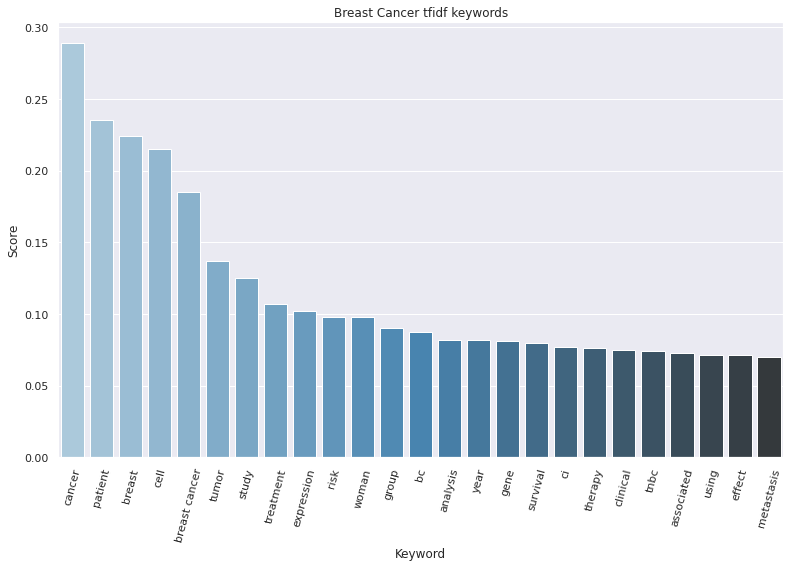

In [200]:
#Sort tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=25):
    
    # Use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    
    # Word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        # Keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    # Create tuples of feature,score
    # Results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    return results

# Sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

# Extract only the top n; n here is 25
keywords=extract_topn_from_vector(feature_names,sorted_items,25)
 
# Print the results, save as CSV
#print()
tfidf_df = pd.DataFrame(list(keywords.items()))
tfidf_df.columns=["Keyword", "Score"]
#print(tfidf_df)

#print("\nAbstract:")
#print(doc)
#print("\nKeywords:")
#for k in keywords:
 #   print(k,keywords[k])
    
sns.set(rc={'figure.figsize':(13,8)})
k=sns.barplot(x="Keyword", y="Score", data=tfidf_df, palette="Blues_d")
k.set_xticklabels(k.get_xticklabels(), rotation=75)
k.set_title(f'{key} tfidf keywords')
k.figure.savefig(f"{key} tfidf.png", bbox_inches = "tight")

'''
import csv
with open(file_prefix + 'td_idf.csv', 'w', newline="") as csv_file:  
    writer = csv.writer(csv_file)
    writer.writerow(["Keyword", "Importance"])
    for key, value in keywords.items():
       writer.writerow([key, value])
'''